In [5]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import os
import sys
import cartopy.crs as ccrs
import xarray as xr
from matplotlib import cm
import cmocean as cmo

In [6]:
##load datasets
ds = xr.open_dataset('/net/kryo/work/koehne/roms/analysis/regridded_data/pactcs60/testrun_T10_pactcs60/avg/z_pactcs601_602_603_604_605_606_607_608_609_avg.nc')
#ds = xr.open_dataset('/net/kryo/work2/fana/hindcast_bec/hindcast/output/avg/z_avg_2016_0-200m.nc')
print('Data Loaded')
##load grid
grid = xr.open_dataset('/net/kryo/work/koehne/roms/input/pactcs60/pactcs60_grd.nc')
#grid = xr.open_dataset('/net/nardus/work/Ana/masks_and_maps/humpac_grids/humpac15_sm5rf015_grd.nc')
print('Grid Loaded')

/home/koehne/.conda/envs/eikes_miniconda/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/home/koehne/.conda/envs/eikes_miniconda/lib/python3.6/site-packages/xarray/coding/variables.py:69: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array)


Data Loaded
Grid Loaded


In [7]:
## SET THE PLOT CONTENTS - ONLY CHOOSE THE VARIABLE TO SHOW AND THE REST SHOULD BE CHOSEN ACCORDINGLY

# Choose the Variable to show
varname = 'O2'
data = eval('ds.'+ varname)

# choose depth level
dix = 20
print(ds.depth[dix].values,'m')


# Choose data range (for colorbar)
if varname=='salt':
    vmin,vmax = 30,37
elif varname=='temp':
    vmin,vmax = 0,30
elif varname=='u':
    vmin,vmax=-1.,1.
elif varname=='v':
    vmin,vmax=-1.,1.
elif varname=='O2':
    vmin,vmax=1.,301.
elif varname=='NO3':
    vmin,vmax=0.,50.
    
# Choose grid
rhogridvars = ['salt','temp','O2','NO3']
if varname in rhogridvars:
    lons = grid.lon_rho
    lats = grid.lat_rho
elif varname == 'u':
    lons = grid.lon_u
    lats = grid.lat_u
elif varname == 'v':
    lons = grid.lon_v
    lats = grid.lat_v
#elif varname == 'O2':
#    lons = grid.lon_rho
#    lats = grid.lat_rho  
    
# choose levels (for Colorbar):
levels = 20
colors = np.linspace(vmin,vmax,levels)

# choose title (units) for colorbar
units = data.units

#choose plot title
plot_title = data.long_name+' at '+str(ds.depth[dix].values)+' m'

# choose colormaps
if varname=='salt':
    colmap = cmo.cm.haline
elif varname=='temp':
    colmap = cmo.cm.thermal
elif varname=='u' or varname == 'v':
    colmap = cmo.cm.delta
elif varname=='O2':
    colmap = cmo.cm.oxy
elif varname=='NO3':
    colmap = cmo.cm.matter

# center_longitude
cl = 200.

# movie preferences
frames = 12
interval = 200

# choose timeseries location
etacho = -60
xicho = 100

-300.0 m


In [ ]:
#Animate surface using contourf
fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cl))
ax.set_extent([100,300,-85, 85], crs=ccrs.PlateCarree())
l = ax.contourf(lons-cl,lats,data[1,dix,:,:],colors,extend="max",cmap=colmap,transform=ccrs.PlateCarree(central_longitude=cl))
ax.coastlines()
ax.set_title(plot_title)
cbar = plt.colorbar(l)
cbar.set_label(units, rotation=270)
#plt.show()
def animate(i):
    l.collections = []
    ax.contourf(lons-cl,lats,data[i+1,dix,:,:],colors,extend="max",cmap=colmap,transform=ccrs.PlateCarree(central_longitude=cl))
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=frames,interval=interval)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
#Animate surface using contourf
fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=225))
ax.set_extent([200,250,20, 65], crs=ccrs.PlateCarree())
l = ax.contourf(lons-225.,lats,data[1,dix,:,:],colors,extend="max",cmap=colmap,transform=ccrs.PlateCarree(central_longitude=225))
l2 = ax.scatter(lons[-60,110]-225,lats[-60,110],50,'k',marker='x')
ax.coastlines()
ax.set_title(plot_title)
cbar = plt.colorbar(l)
cbar.set_label(units, rotation=270)
#plt.show()
def animate(i):
    l.collections = []
    l2.collections = []
    ax.contourf(lons-225.,lats,data[i+1,dix,:,:],colors,extend="max",cmap=colmap,transform=ccrs.PlateCarree(central_longitude=225))
    ax.scatter(lons[-60,110]-225,lats[-60,110],50,'k',marker='x')
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=frames,interval=interval)

from IPython.display import HTML
HTML(ani.to_jshtml())

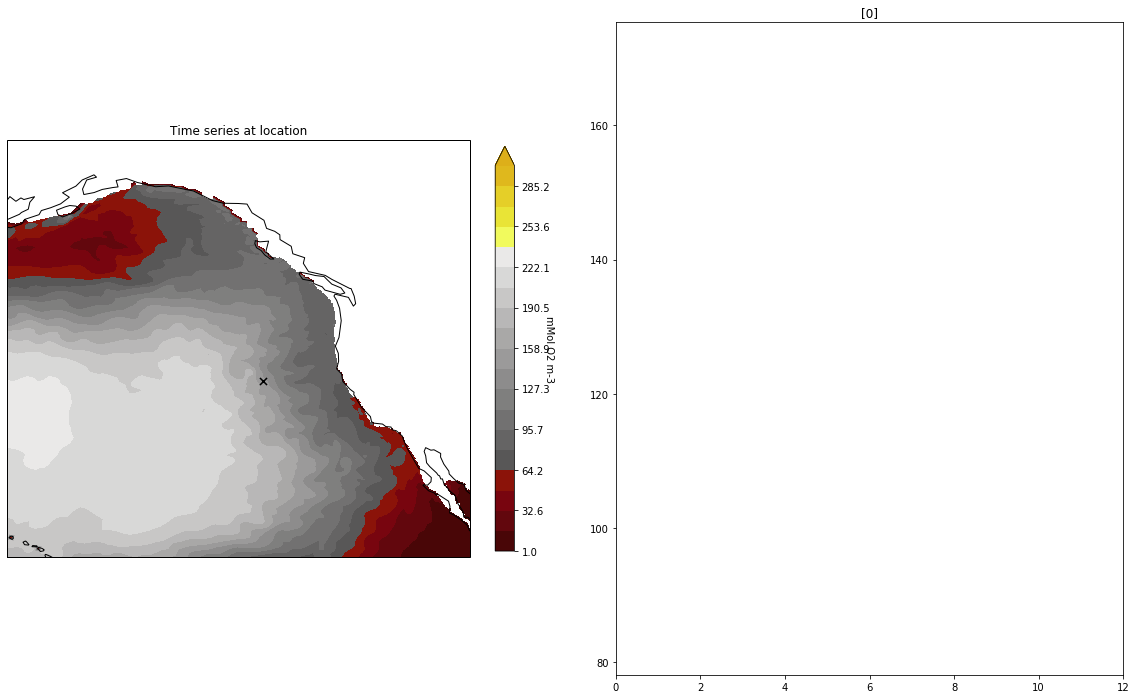

In [8]:
#Animate surface using contourf
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=225))
ax.set_extent([200,250,20, 65], crs=ccrs.PlateCarree())
l = ax.contourf(lons-225.,lats,data[1,dix,:,:],colors,extend="max",cmap=colmap,transform=ccrs.PlateCarree(central_longitude=225))
l2 = ax.scatter(lons[etacho,xicho]-225,lats[etacho,xicho],70,'k',marker='x')
ax.coastlines()
ax.set_title(plot_title)
cbar = plt.colorbar(l,fraction=0.038)
cbar.set_label(units, rotation=270)

ax2 = fig.add_subplot(122)
ax2.axis([0,12,np.min(data[:,dix,etacho,xicho]),np.max(data[:,dix,etacho,xicho])])
l3, = ax2.plot([],[])

#plt.show()
def animate(i):
    l.collections = []
    l2.collections = []
    ax.contourf(lons-225.,lats,data[i,dix,:,:],colors,extend="max",cmap=colmap,transform=ccrs.PlateCarree(central_longitude=225))
    ax.scatter(lons[etacho,xicho]-225,lats[etacho,xicho],50,'k',marker='x')
    ax.set_title('Time series at location')
    l3.set_data(np.arange(i+1),data[:i+1,dix,etacho,xicho])
    ax2.set_title(str(np.arange(i+1)))
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=frames,interval=interval)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [7]:
np.shape(data[:,:,etacho,xicho].T)

(33, 108)

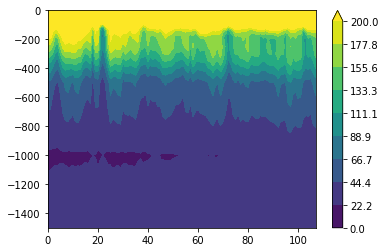

In [8]:
# make a depth-time diagram of the data at the chosen location
plt.subplots()
plt.contourf(np.arange(108),data.depth,data[:,:,etacho,xicho].T,levels=np.linspace(0,200,10),extend="max")
plt.ylim([-1500,0])
plt.colorbar()
plt.show()